In [1]:
import ecdbr
from IPython.display import display

# First example

## Creating signals

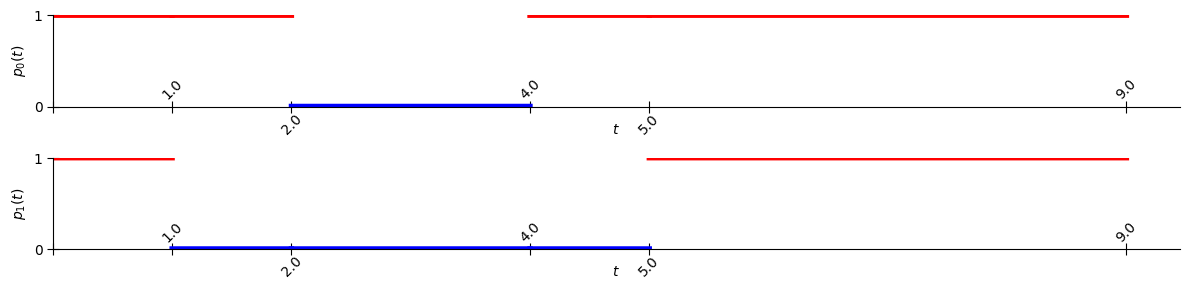

In [2]:
si = ecdbr.Signal([
    ecdbr.Segment(0, [1, 1], 1),
    ecdbr.Segment(1, [1, 0], 2),
    ecdbr.Segment(2, [0, 0], 4),
    ecdbr.Segment(4, [1, 0], 5),
    ecdbr.Segment(5, [1, 1], 9),
])
si

## Applying ```range_sort```

In [3]:
rs = ecdbr.range_sort(si)
rs

[0, 0]: [2, 4]
[1, 0]: [1, 2] [4, 5]
[1, 1]: [0, 1] [5, 9]

## Applying `hdist`

### By creating intervals by hand

In [4]:
ecdbr.h_dist(ecdbr.RangeUnion([[2, 4]]), ecdbr.RangeUnion([[1, 2], [4, 5]]))

1.0

### By using the result of `range_sort`

In [5]:
ecdbr.h_dist(rs[0].ranges(), rs[1].ranges())

1.0

## Applying `dist`

In [6]:
ecdbr.dist(si, si)

0.0

# Second example

## Creating signals

In [7]:
sis = ecdbr.Signal([
    ecdbr.Segment(0, [1], 5),
    ecdbr.Segment(5, [0], 8),
])
sir = ecdbr.Signal([
    ecdbr.Segment(0, [0], 3),
    ecdbr.Segment(3, [1], 8),
])

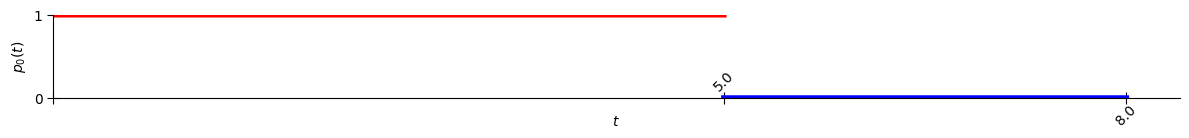

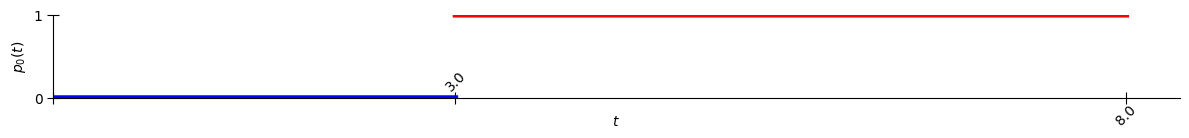

In [8]:
display(sis, sir)

## Applying ```range_sort```

In [9]:
for s in [sis, sir]:
    print(ecdbr.range_sort(s), end='\n\n')

[0]: [5, 8]
[1]: [0, 5]

[0]: [0, 3]
[1]: [3, 8]



## Result of ```dist```

In [10]:
ecdbr.dist(sis, sir)

5.0

# STL<sub>r</sub>

In [11]:
from ecdbr import Formula

Formulae can be built from the following functions: 
- `var(var_num)`: creates a formula describing a variable
- `disj(left, right)`: creates a disjunction between two formulae
- `until(a, b, left, right)`: applies the “Until” operator
- `g(start, end, b)`: applies the “Globally” operator
- `gfi(end, left, right)`: creates a formula describing □(B<sub>1</sub> ⇒ ♢<sub>[0,b]</sub>B<sub>2</sub>)
- `neg(f)`: denies a formula.

In [12]:
display(
    Formula.g(
        0,
        3,
        Formula.disj(
            Formula.neg(Formula.var(0)),
            Formula.var(1))),
    Formula.until(
        0,
        1,
        Formula.var(0),
        Formula.var(1))
)

In [13]:
f = Formula.gfi(3, Formula.var(0), Formula.disj(
    Formula.var(0),
    Formula.var(1)
))

b1 = Formula.disj(
    Formula.var(0),
    Formula.var(1)
)

display(f, b1)

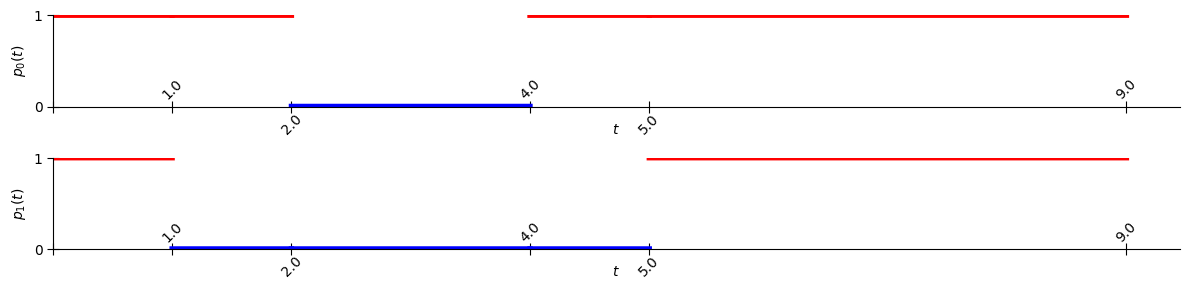

In [14]:
si

# Distance between a signal and a formula

## Main operation

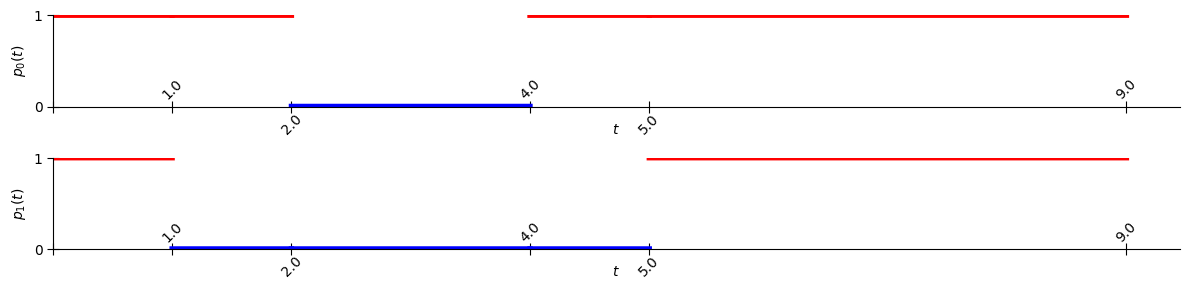

In [15]:
display(f, si)

In [16]:
ecdbr.algo4(si, f)

0.5

## Auxiliary methods
### Colouring signal
One of the operations consists in rewriting the formula and the signal. This corresponds to the `colour` function.

'before:'

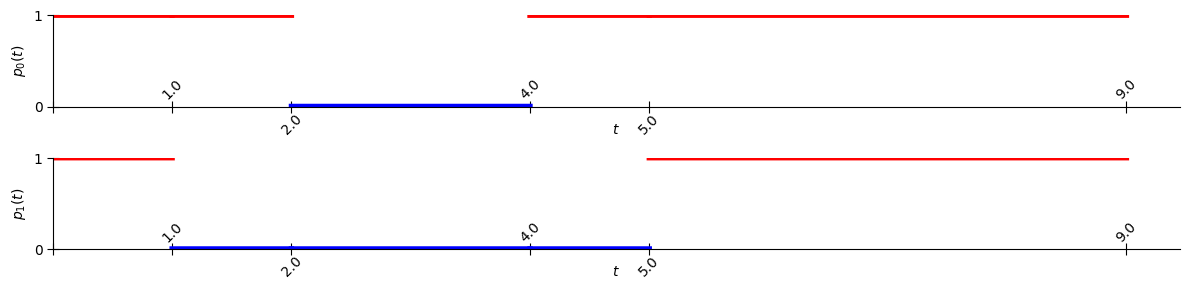

'after:'

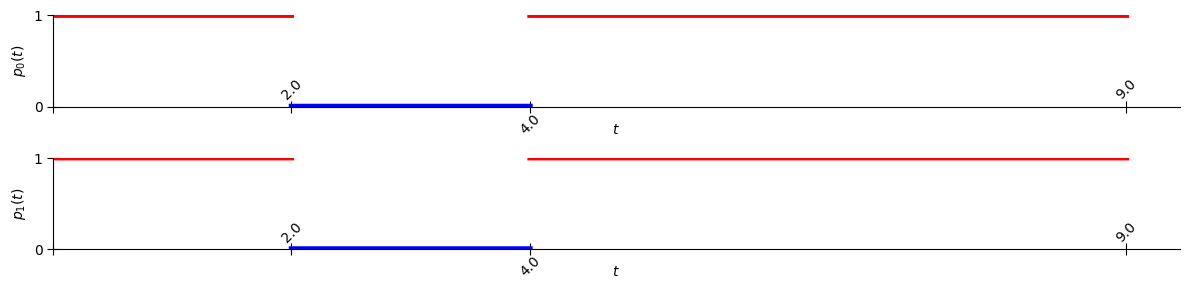

In [17]:
[signal, formula] = ecdbr.colour(si, f, Formula.var(0), b1)
display("before:", f, si, "after:", formula, signal)

## Manipulating operations

Operations on `Signal`s and functions can be handled using the `Operation` class.

In [18]:
# Create a "Const" operation
op_const = ecdbr.Operation("const", 2)
# Create the associated Plot
op_plot = op_const.apply([])
# Create a "IdDiff" operation
op_id = ecdbr.Operation("iddiff")
# Apply operation to op_plot
plot_id = op_id.apply([op_plot])

In practice, there is no operation on `Signal`s, so they must be converted to `Plot` using `to_plot`.

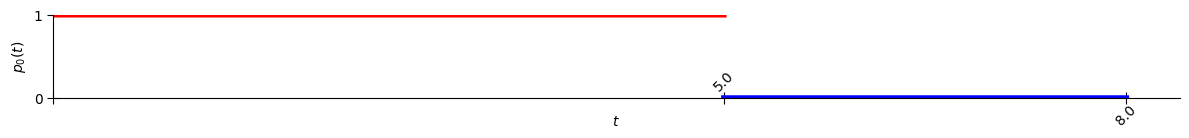

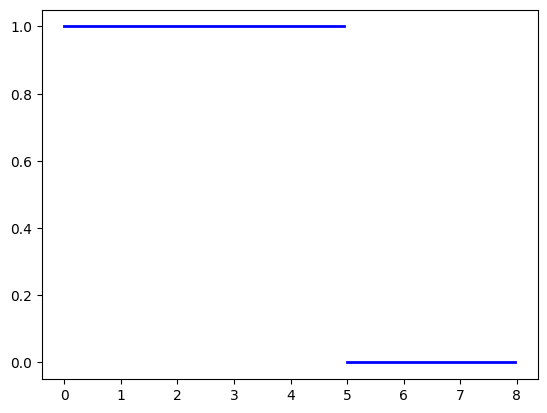

In [19]:
sis
sis_plot = sis.to_plot(0)
display(sis, sis_plot)

## Second example 

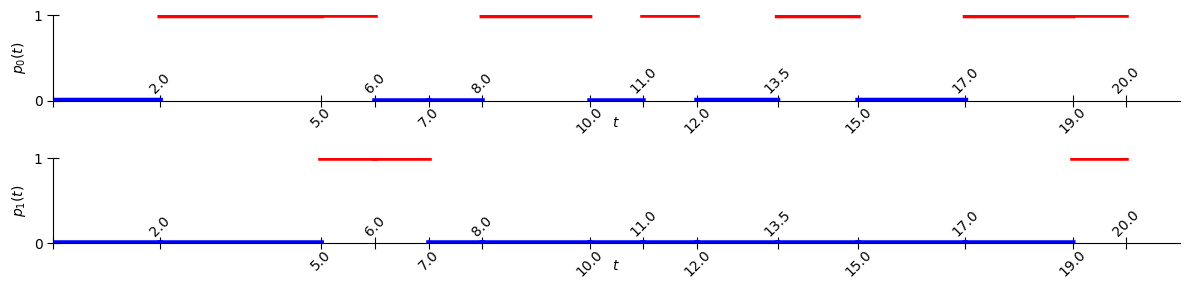

In [20]:
si = ecdbr.Signal([
    ecdbr.Segment(0, [0, 0], 2),
    ecdbr.Segment(2, [1, 0], 5),
    ecdbr.Segment(5, [1, 1], 6),
    ecdbr.Segment(6, [0, 1], 7),
    ecdbr.Segment(7, [0, 0], 8),
    ecdbr.Segment(8, [1, 0], 10),
    ecdbr.Segment(10, [0, 0], 11),
    ecdbr.Segment(11, [1, 0], 12),
    ecdbr.Segment(12, [0, 0], 13.5),
    ecdbr.Segment(13.5, [1, 0], 15),
    ecdbr.Segment(15, [0, 0], 17),
    ecdbr.Segment(17, [1, 0], 19),
    ecdbr.Segment(19, [1, 1], 20),
])
si

In [21]:
formula = ecdbr.Formula.gfi(2, ecdbr.Formula.var(0), ecdbr.Formula.var(1))
formula

In [22]:
ecdbr.algo4(si, formula)

-2.5